In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("BMX_G.csv")
df.head() 

,Unnamed: 0,seqn,bmdstats,bmxwt,bmiwt,bmxrecum,bmirecum,bmxhead,bmihead,bmxht,...,bmxarmc,bmiarmc,bmxwaist,bmiwaist,bmxsad1,bmxsad2,bmxsad3,bmxsad4,bmdavsad,bmdsadcm
0,1,62161,1,69.2,NaN,NaN,NaN,NaN,NaN,172.3,...,32.5,NaN,81.0,NaN,17.7,17.9,NaN,NaN,17.8,NaN
1,2,62162,1,12.7,NaN,95.7,NaN,NaN,NaN,94.7,...,16.6,NaN,45.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,62163,1,49.4,NaN,NaN,NaN,NaN,NaN,168.9,...,22.0,NaN,64.6,NaN,15.6,15.5,NaN,NaN,15.6,NaN
3,4,62164,1,67.2,NaN,NaN,NaN,NaN,NaN,170.1,...,29.3,NaN,80.1,NaN,18.3,18.5,NaN,NaN,18.4,NaN
4,5,62165,1,69.1,NaN,NaN,NaN,NaN,NaN,159.4,...,29.7,NaN,86.7,NaN,21.0,20.8,NaN,NaN,20.9,NaN


In [137]:
df.shape

(9338, 27)

In [138]:
df.isnull().sum()

Unnamed: 0       0
seqn             0
bmdstats         0
bmxwt           95
bmiwt         8959
bmxrecum      8259
bmirecum      9307
bmxhead       9102
bmihead       9338
bmxht          723
bmiht         9070
bmxbmi         736
bmdbmic       5983
bmxleg        2383
bmileg        8984
bmxarml        512
bmiarml       8969
bmxarmc        512
bmiarmc       8965
bmxwaist      1134
bmiwaist      8882
bmxsad1       2543
bmxsad2       2543
bmxsad3       8940
bmxsad4       8940
bmdavsad      2543
bmdsadcm      8853
dtype: int64

In [139]:
new_df = df.dropna(subset=['bmxleg','bmxwaist'])
new_df.shape
new_df

,Unnamed: 0,seqn,bmdstats,bmxwt,bmiwt,bmxrecum,bmirecum,bmxhead,bmihead,bmxht,...,bmxarmc,bmiarmc,bmxwaist,bmiwaist,bmxsad1,bmxsad2,bmxsad3,bmxsad4,bmdavsad,bmdsadcm
0,1,62161,1,69.2,NaN,NaN,NaN,NaN,NaN,172.3,...,32.5,NaN,81.0,NaN,17.7,17.9,NaN,NaN,17.8,NaN
2,3,62163,1,49.4,NaN,NaN,NaN,NaN,NaN,168.9,...,22.0,NaN,64.6,NaN,15.6,15.5,NaN,NaN,15.6,NaN
3,4,62164,1,67.2,NaN,NaN,NaN,NaN,NaN,170.1,...,29.3,NaN,80.1,NaN,18.3,18.5,NaN,NaN,18.4,NaN
4,5,62165,1,69.1,NaN,NaN,NaN,NaN,NaN,159.4,...,29.7,NaN,86.7,NaN,21.0,20.8,NaN,NaN,20.9,NaN
5,6,62166,1,28.8,NaN,NaN,NaN,NaN,NaN,133.4,...,19.1,NaN,59.8,NaN,13.5,13.5,NaN,NaN,13.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9333,9334,71912,1,87.8,NaN,NaN,NaN,NaN,NaN,177.3,...,33.1,NaN,104.4,NaN,24.4,24.5,NaN,NaN,24.5,NaN
9334,9335,71913,1,56.5,NaN,NaN,NaN,NaN,NaN,161.6,...,27.5,NaN,79.0,NaN,17.5,17.7,NaN,NaN,17.6,NaN
9335,9336,71914,1,32.3,NaN,NaN,NaN,NaN,NaN,148.1,...,20.1,NaN,59.6,NaN,12.5,12.9,NaN,NaN,12.7,4.0
9336,9337,71915,1,78.4,NaN,NaN,NaN,NaN,NaN,168.8,...,33.4,NaN,106.6,NaN,23.1,22.9,NaN,NaN,23.0,NaN


In [140]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6899 entries, 0 to 9337
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  6899 non-null   int64  
 1   seqn        6899 non-null   int64  
 2   bmdstats    6899 non-null   int64  
 3   bmxwt       6889 non-null   float64
 4   bmiwt       24 non-null     float64
 5   bmxrecum    0 non-null      float64
 6   bmirecum    0 non-null      float64
 7   bmxhead     0 non-null      float64
 8   bmihead     0 non-null      float64
 9   bmxht       6891 non-null   float64
 10  bmiht       148 non-null    float64
 11  bmxbmi      6882 non-null   float64
 12  bmdbmic     1959 non-null   float64
 13  bmxleg      6899 non-null   float64
 14  bmileg      0 non-null      float64
 15  bmxarml     6893 non-null   float64
 16  bmiarml     0 non-null      float64
 17  bmxarmc     6895 non-null   float64
 18  bmiarmc     2 non-null      float64
 19  bmxwaist    6899 non-null   floa

In [141]:
points = new_df.iloc[:,[13,19]].values
print(len(points))
x = points[:,0]
print(x)
y = points[:,1]
print(y)

6899
[40.2 40.3 40.5 ... 35.6 32.9 40.1]
[ 81.   64.6  80.1 ...  59.6 106.6  69.2]


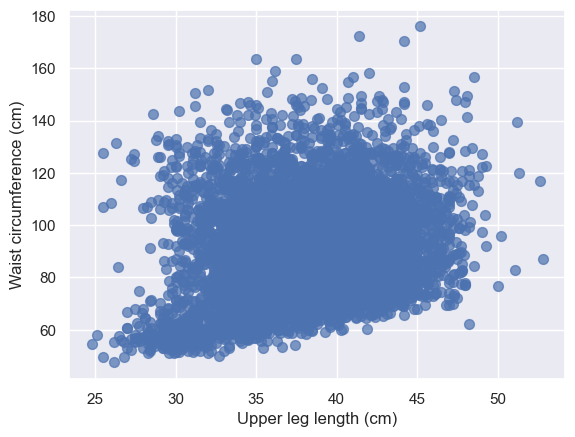

In [142]:
plt.scatter(x,y,s=50,alpha=0.7)
plt.xlabel('Upper leg length (cm)')
plt.ylabel('Waist circumference (cm)')
plt.show()

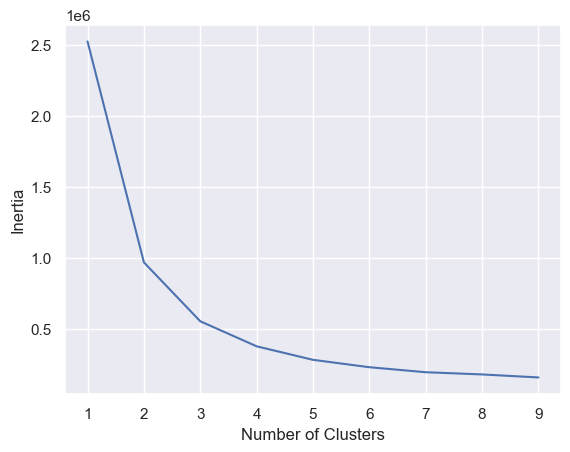

In [143]:
inertias = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, random_state=0)
    kmeans.fit(points)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,10),inertias)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

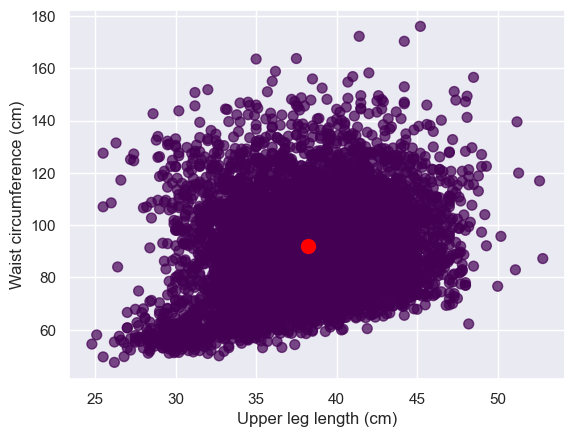

In [144]:
kmeans = KMeans(n_clusters=,random_state=0)
kmeans.fit(points)
predicted_cluster_indexes = kmeans.predict(points)

plt.scatter(x,y,c=predicted_cluster_indexes,s=50,alpha=0.7,cmap='viridis')
plt.xlabel('Upper leg length (cm)')
plt.ylabel('Waist circumference (cm)')
center = kmeans.cluster_centers_
plt.scatter(center[:,0],center[:,1], c='red',s=100)
plt.show()

In [145]:
print(center)

[[38.19884041 91.87654733]]
